In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/GiveMeSomeCredit'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


# 定义问题与数据读取
* 本次竞赛的所要预测的问题：某人在未来两年内遭遇财务困境的可能性。

In [2]:
#读取数据
train_df = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv')
test_df = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-test.csv')

#  数据探索与预处理
> **1. 数据探索**

In [3]:
train_df.head()   #查看训练集前5行数据

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
test_df.head()    #查看测试集前5行数据

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [5]:
train_df.columns   #查看训练集的特征

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

分类型特征：SeriousDlqin2yrs

数值型特征：
              比率标度：RevolvingUtilizationOfUnsecuredLines、DebtRatio
              连续型特征：age、MonthlyIncome
              离散型特征：NumberOfOpenCreditLinesAndLoans、NumberOfTime30-   59DaysPastDueNotWorse、NumberOfTime60-89DaysPastDueNotWorse、NumberOfTimes90DaysLate、NumberOfDependents

In [6]:
train_df.info()        #查看训练集信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

训练集总共有150000条数据，数据类型都是int和float，MonthlyIncome（月收入）和NumberOfDependents（家属数量）有缺失值

In [7]:
test_df.info()    ##查看测试集信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

测试集总共有101503条数据，MonthlyIncome和NumberOfDependents都有缺失值。

**查看缺失值**

In [8]:
train_df.isnull().sum()   #具体查看训练集缺失值

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [9]:
test_df.isnull().sum()    #具体查看测试集缺失值

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

训练集和测试集的缺失值数量都占比较大，所以不能直接删除。
MonthlyIncome属于连续型数值特征，且缺失较多，可以用平均数填补缺失值。NumberOfDependents可以用中位数填充空值。

**查看异常值**

In [10]:
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


训练集和测试集RevolvingUtilizationOfUnsecuredLines在75%值为0.55，最大值却为50578，可能分布不均或是异常值存在。DebtRatio也是同样的问题。NumberOf-Time30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse三种的最大值都是98。训练集age最小值存在0，有异常值。家属数量最大值有43。

In [11]:
train_df.describe(percentiles=[.61, .62, .68, .69, .75, .8, .99])

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
61%,91500.390000,0.000000,0.286275,56.000000,0.000000,0.479827,6.459000e+03,9.000000,0.000000,1.000000,0.000000,1.000000
62%,93000.380000,0.000000,0.301057,57.000000,0.000000,0.493251,6.537000e+03,9.000000,0.000000,1.000000,0.000000,1.000000
68%,102000.320000,0.000000,0.405607,60.000000,0.000000,0.598695,7.250000e+03,10.000000,0.000000,1.000000,0.000000,1.000000
69%,103500.310000,0.000000,0.425089,60.000000,0.000000,0.623236,7.415000e+03,10.000000,0.000000,1.000000,0.000000,1.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000


具体查看一下age的情况

In [12]:
train_df.loc[train_df['age'] < 18]    #查看age小于18的情况

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


age小于18的数据只有一条，用中位数填充就好

查看以下三条相近特征的箱线图，看是否有异常值

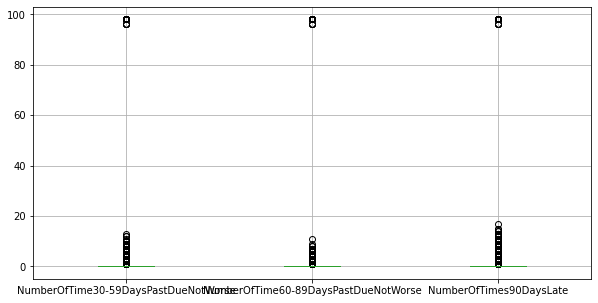

In [13]:
plt.figure(figsize=(10, 5)) 
train_df[['NumberOfTime30-59DaysPastDueNotWorse', 
          'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfTimes90DaysLate']].boxplot()
plt.show()

可以看到三个特征都存在异常点，将异常值都删掉。

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

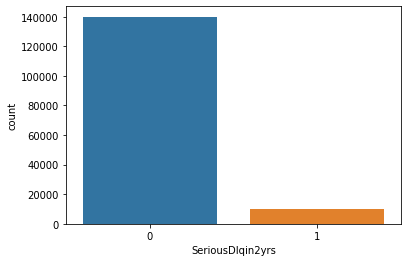

In [14]:
# 查看SeriousDlqin2yrs分布
plt.figure()
sns.countplot('SeriousDlqin2yrs',data=train_df)

可以看到为0的占比大多数，分类非常不平衡，可能会造成预测性能下降。

<AxesSubplot:title={'center':'heatmap'}>

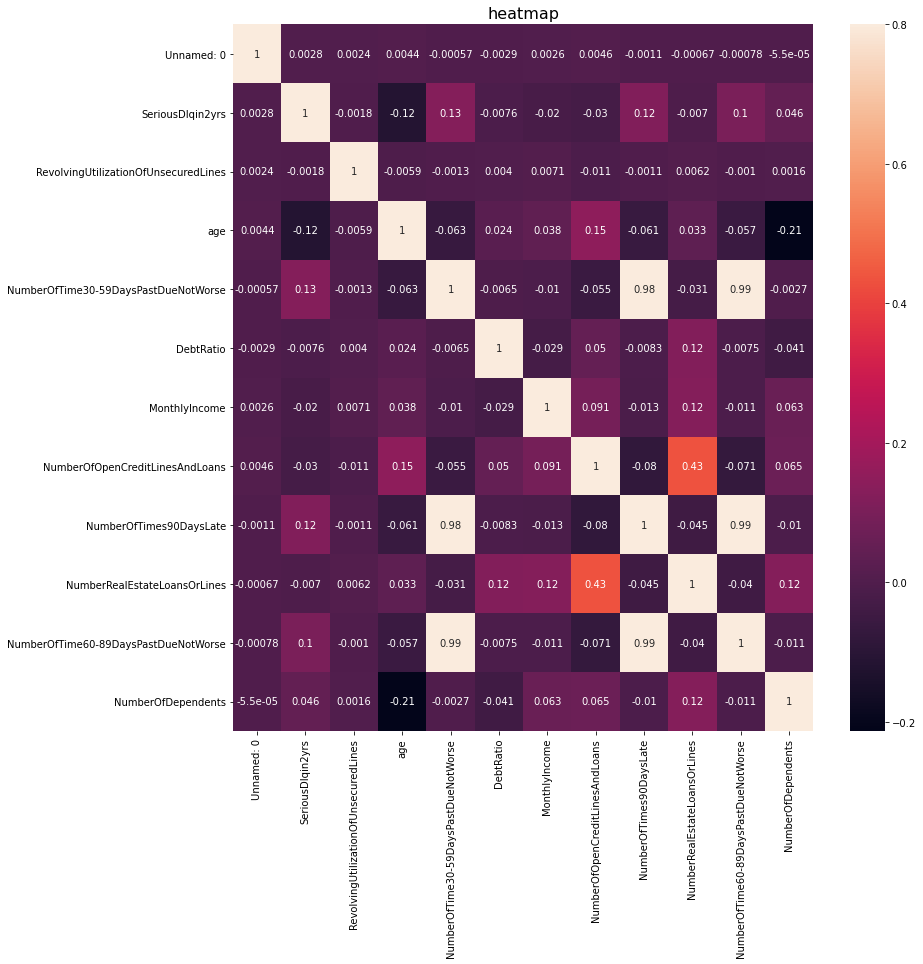

In [15]:
correlation = train_df.corr()
f , ax = plt.subplots(figsize = (13, 13))
plt.title('heatmap',y=1,size=16)
sns.heatmap(correlation,annot = True,  vmax=0.8)

这时的热力图是还没消除异常值的情况下

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


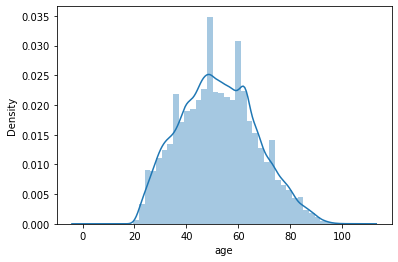

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


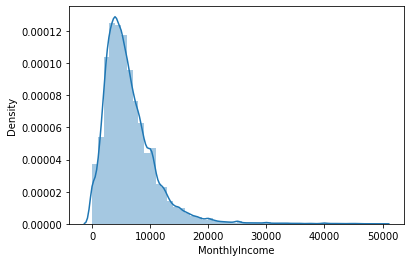

In [16]:
age=train_df['age']
sns.distplot(age)
plt.show()

mi=train_df[train_df['MonthlyIncome']<50000]['MonthlyIncome']
sns.distplot(mi)
plt.show()      #观察图，年龄和收入分布皆近似正态分布！）

年龄和收入分布近似正态分布。

# 2.数据预处理 

In [17]:
train_df.drop_duplicates(inplace=True)    #去重

对未命名的第一列重命名为ID，方便观察。

In [18]:
train_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
test_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

将NumberOf-Time30-59DaysPastDueNotWorse, NumberOfTimes90Days-Late, NumberOfTime60-89DaysPastDueNotWorse大于90的点删除。

In [19]:
train_df = train_df[train_df['NumberOfTime30-59DaysPastDueNotWorse'] < 90] 
train_df = train_df[train_df['NumberOfTimes90DaysLate'] < 90] 
train_df = train_df[train_df['NumberOfTime60-89DaysPastDueNotWorse'] < 90] 

家属人数大于8的设为8。

In [20]:
k = 0
for i in train_df['NumberOfDependents']:
    if i>8:
        train_df['NumberOfDependents'].values[k]=8
    k +=1
k = 0
for i in test_df['NumberOfDependents']:
    if i>8:
        test_df['NumberOfDependents'].values[k]=8
    k +=1

age为0的用中位数填充。

In [21]:
k = 0
for i in test_df['age']:
    if i==0:
        test_df['age'].values[k]=test_df['age'].median()
    k +=1
k = 0
for i in train_df['age']:
    if i==0:
        train_df['age'].values[k]=train_df['age'].median()
    k +=1

用中位数填充年龄小于18的数据。

In [22]:
train_df.loc[train_df['age'] < 18, 'age'] = train_df['age'].median()

用平均数填充MonthlyIncome空值，用中位数填充NumberOf-Dependents空值。

In [23]:
train_df['MonthlyIncome'] = train_df['MonthlyIncome'].replace(np.nan,train_df['MonthlyIncome'].mean())
test_df['MonthlyIncome'] = test_df['MonthlyIncome'].replace(np.nan,test_df['MonthlyIncome'].mean())
train_df['NumberOfDependents'] = train_df['NumberOfDependents'].replace(np.nan,train_df['NumberOfDependents'].median())
test_df['NumberOfDependents'] = test_df['NumberOfDependents'].replace(np.nan,test_df['NumberOfDependents'].median())

划分训练集合测试集。

In [24]:
from sklearn.model_selection import train_test_split
x = train_df.drop(['SeriousDlqin2yrs', 'ID'],axis=1)
y= train_df['SeriousDlqin2yrs']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

写出绘图auc曲线函数

In [25]:
#auc绘图
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--") # 画直线做参考
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

# 3.模型选择

AUC Score : 0.8433818393421899


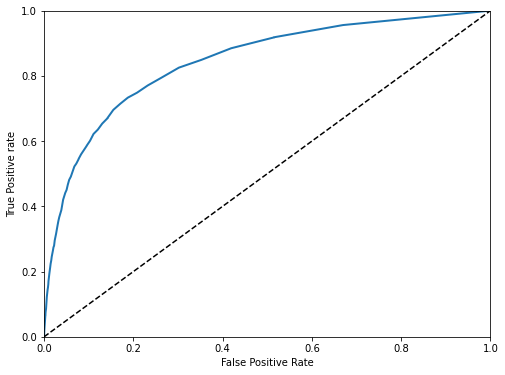

In [26]:
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
#随机森林
from  sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
pred=rfc.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr,tpr)
plot_roc_curve(fpr,tpr)
print ('AUC Score :', roc_auc)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


AUC Score : 0.8620289277399312


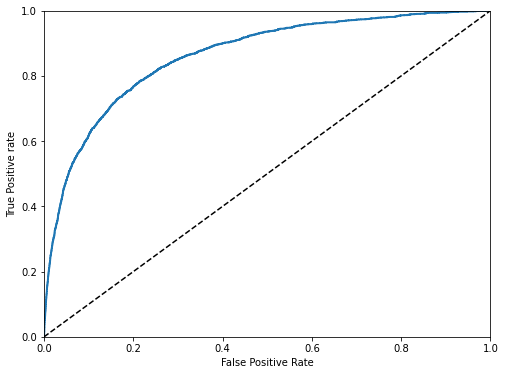

In [27]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=5,eval_metric='auc',objective='binary:logistic')
model.fit(x_train, y_train)
# make predictions for test data
y_pred = model.predict_proba(x_test)[:,1]
# evaluate predictions
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
print ('AUC Score :', roc_auc)
plot_roc_curve(fpr,tpr)

AUC Score : 0.8664226649455407


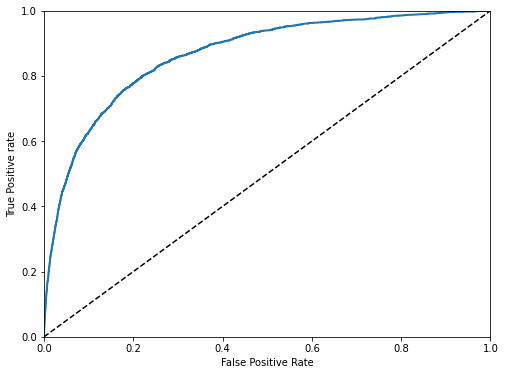

In [28]:

from sklearn.ensemble import GradientBoostingClassifier
gbc_clf_submission = GradientBoostingClassifier()
gbc_clf_submission.fit(x_train,y_train)
gbc_clf_proba = gbc_clf_submission.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, gbc_clf_proba)
roc_auc = auc(fpr,tpr)
print ('AUC Score :', roc_auc)
plot_roc_curve(fpr,tpr)

# 4.优化调参

先对提升框架内的，迭代次数和学习率做调整，选一个较小的学习率，对迭代次数网格化调参。

In [29]:
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# param_test1 = {'n_estimators':range(20,81,10)}
# gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
#                                   min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10),
#                        param_grid = param_test1, scoring='roc_auc',cv=5)
# gsearch1.fit(x_train,y_train)
# means = gsearch1.cv_results_['mean_test_score']
# params = gsearch1.cv_results_['params']
# print(means)
# print(params)

找到了一个合适的迭代次数，现在开始对决策树进行调参。首先我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。

In [30]:
# param_test2 = {'max_depth':range(3,10,2), 'min_samples_split':range(100,801,200)}
# gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, min_samples_leaf=20, 
#       max_features='sqrt', subsample=0.8, random_state=10), 
#    param_grid = param_test2, scoring='roc_auc', cv=5)
# gsearch2.fit(x_train,y_train)
# means = gsearch2.cv_results_['mean_test_score']
# params = gsearch2.cv_results_['params']
# print(means)
# print(params)

由于决策树深度7是一个比较合理的值，所以把它定下来，对于内部节点再划分所需最小样本数min_samples_split，暂时不能一起定下来，因为这个和决策树其他的参数存在关联。再对min_samples_split和min_samples_leaf一起调参。

In [31]:
# param_test3 = {'min_samples_split':range(800,1900,200), 'min_samples_leaf':range(60,101,10)}
# gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=7,
#                                      max_features='sqrt', subsample=0.8, random_state=10), 
#                        param_grid = param_test3, scoring='roc_auc', cv=5)
# gsearch3.fit(x_train,y_train)
# means = gsearch3.cv_results_['mean_test_score']
# params = gsearch3.cv_results_['params']
# print(means)
# print(params)

In [32]:
# gbm1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=7, min_samples_leaf =120, 
#                min_samples_split =1000, max_features='sqrt', subsample=0.8, random_state=10)
# gbm1.fit(x_train,y_train)
# gbc_clf_proba = gbm1.predict_proba(x_test)[:,1]
# y_pred = gbm1.predict(x_test)
# fpr, tpr, _ = roc_curve(y_test, gbc_clf_proba)
# roc_auc = auc(fpr,tpr)
# plot_roc_curve(fpr,tpr)
# print ('AUC Score :', roc_auc)

In [33]:
# param_test4 = {'max_features':range(1,9)}
# gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=7, min_samples_leaf =120, 
#                min_samples_split =1000, subsample=0.8, random_state=10), 
#                        param_grid = param_test4, scoring='roc_auc', cv=5)
# gsearch4.fit(x_train,y_train)
# means = gsearch4.cv_results_['mean_test_score']
# params = gsearch4.cv_results_['params']
# print(means)
# print(params)

In [34]:
# param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
# gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=7, min_samples_leaf =120, 
#                min_samples_split =1000, max_features=4, random_state=10), 
#                        param_grid = param_test5, scoring='roc_auc', cv=5)
# gsearch5.fit(x_train,y_train)
# means = gsearch5.cv_results_['mean_test_score']
# params = gsearch5.cv_results_['params']
# print(means)
# print(params)

AUC Score : 0.8684402994052954


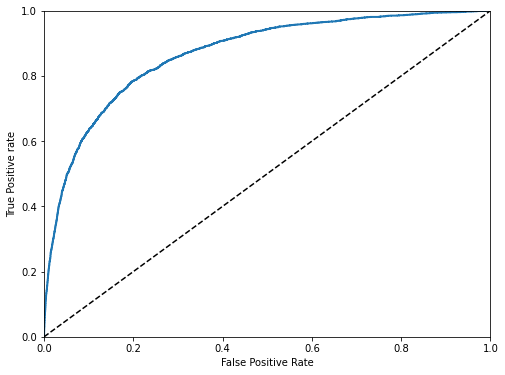

In [35]:
gbm1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=900,max_depth=7, min_samples_leaf =120, 
               min_samples_split =1000, max_features='sqrt', subsample=0.8, random_state=10)
gbm1.fit(x_train,y_train)
gbc_clf_proba = gbm1.predict_proba(x_test)[:,1]
y_pred = gbm1.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, gbc_clf_proba)
roc_auc = auc(fpr,tpr)
plot_roc_curve(fpr,tpr)
print ('AUC Score :', roc_auc)

In [36]:
test_df = test_df.drop(['SeriousDlqin2yrs', 'ID'],axis=1)
gbc_clf_proba = gbm1.predict_proba(test_df)[:,1]
ids = np.arange(1,101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': gbc_clf_proba})
submission.to_csv("submision.csv", index=False)

最后运用新参数拟合模型，得到最终模型。